The goal here is to look at the overlap between 4MOST footprint and depth/ebv-limited extragalactic (EG) footprint for each cadence.

We calculate the overlap as a percentage since we dont have the 4MOST footprint at the HEALPix resolution of the EG footprints. The 4MOST pixels that we have are only for the centers of the instrument's FOV, so we make the footprint contiguous by making our HEALPix map coarser. We do the same for our EG footprint and see how much of 4MOST footprint is covered by our EG footprint.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import numpy as np
import pandas as pd

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

**Set up some things**

In [3]:
nsides = {}
nsides['lsst'] = 256  # know that lsst EG footprints are with nside 256 pixelizations
data_dir = '/global/homes/a/awan/desc/depth_data_outputs/'   # where extragalctic footprints sit
footprint_dir = '/global/homes/a/awan/desc/4most_desi_data/' # where DESI, 4MOST footprints sit.

outDir = '/global/homes/a/awan/desc/depth_data_outputs/comparisons/'  # where new plots will be stored here.
yrs = ['1yr', '3yr', '6yr', '10yr']

# set up for plots
colors = ['m', 'b', 'g', 'k']
shapes = ['o', 'v', 's', 'd']

In [4]:
def get_area(nside, npix):
    return hp.nside2pixarea(nside=nside, degrees=True)*npix

def plot_skymap(tag, hpixel_in, nside, return_footprint=False, show_plot=True):
    npix = hp.nside2npix(nside=nside)
    vals = np.zeros(npix)+5000
    footprint = vals.view(np.ma.MaskedArray)
    footprint.mask = [True]*npix
    footprint.fill_value = np.nan
    footprint.mask[hpixel_in] = False

    if show_plot:
        plt.clf()
        hp.mollview(footprint, flip='astro', rot=(0,0,0), min=0, max=10,
                    title='%s footprint: %.2f deg2; nside %s'%(tag,
                                                               get_area(nside=nside, npix=len(hpixel_in)),
                                                               nside)
                   )
        hp.graticule(dpar=20, dmer=20, verbose=False)
        plt.show()
    
    if return_footprint:
        return footprint

**Read in 4MOST footprint**. See more in 4MOST_footprint.ipynb

In [5]:
footprint_pixels = {}
key = '4MOST'
for i, file in enumerate([f for f in os.listdir(footprint_dir) if f.startswith(key) and f.__contains__('ring')]):
    if i>0: raise ValueError('Somethings wrong.')
    print('Reading %s'%file)
    nsides[key] = int(file.split('nside')[-1].split('_')[0])
    print('nside: %s'%nsides[key])
    footprint_pixels[key] = pd.read_csv('%s/%s'%(footprint_dir, file))['pixNum'].values

Reading 4MOST_pixels_nside16_ring.csv
nside: 16


**Read in DESI footprint**. See more in DESI_footprint.ipynb

In [6]:
key = 'DESI'
for i, file in enumerate([f for f in os.listdir(footprint_dir) if f.startswith(key) and f.__contains__('ring')]):
    if i>0: raise ValueError('Somethings wrong.')
    print('Reading %s'%file)
    nsides[key] = int(file.split('nside')[-1].split('_')[0])
    print('nside: %s'%nsides[key])
    footprint_pixels[key] = pd.read_csv('%s/%s'%(footprint_dir, file))['pixNum'].values

Reading DESI_pixels_nside256_ring.csv
nside: 256


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

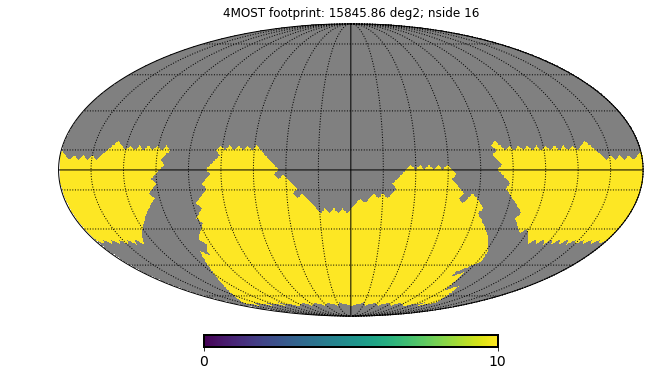

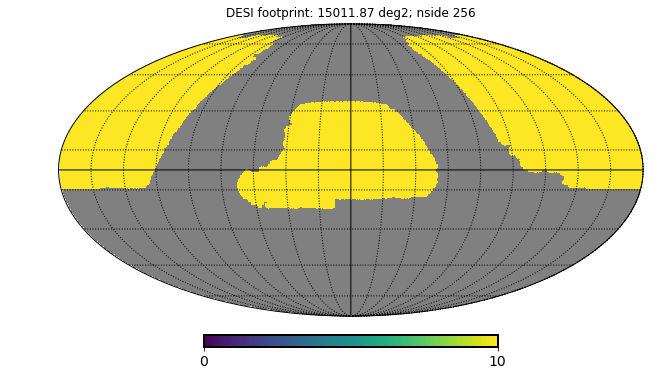

In [7]:
# okay create a mask out of the nside
for key in footprint_pixels:
    plot_skymap(tag=key, hpixel_in=footprint_pixels[key], nside=nsides[key])

**Make the maps to the same level**

We choose to retain the highest nside level possible, as then at least the LSST footprint area would be more reliable. 4MOST one is the limiting factor since the map is coarse resolution (nside 16).

nside_final: 256

Degrading 4MOST footprint from nside 16 to 256


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

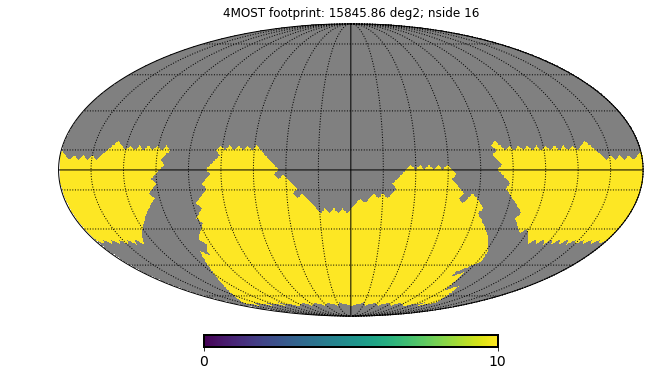

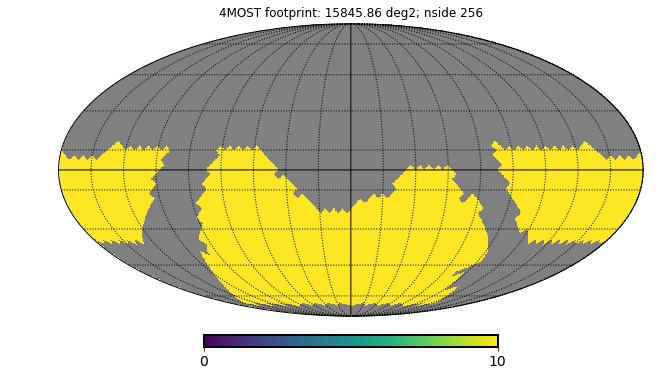

In [8]:
nside_final = 256
for key in nsides:
    nside_final = max(nside_final, nsides[key])
print('nside_final: %s\n'%nside_final)

for key in footprint_pixels:
    if nsides[key]!=nside_final:
        print('Degrading %s footprint from nside %s to %s'%(key, nsides[key], nside_final))
        
        footprint = plot_skymap(tag=key, hpixel_in=footprint_pixels[key], nside=nsides[key], return_footprint=True)
        
        # now degrade
        footprint.fill_value = -100
        footprint = hp.ud_grade(footprint, nside_out=nside_final, pess=True)
        
        footprint_pixels[key] = np.where(footprint.data>5)[0]
        
        plot_skymap(tag=key, hpixel_in=footprint_pixels[key], nside=nside_final)

**Okay lets read in the EG footprint for each cadence and look at the overlap with 4MOST and/or DESI**


## Reading in eg_footprint_kraken_2036_1yr_nside256_HEALPixels.csv


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

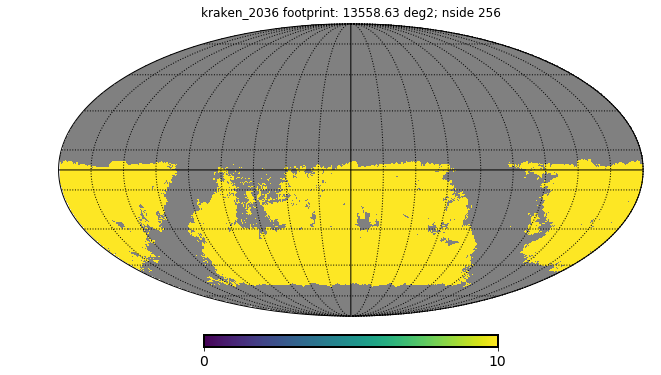

## Calculating the overlaps .. 


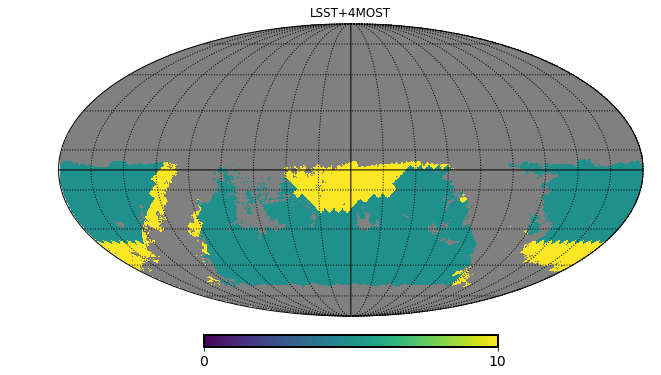

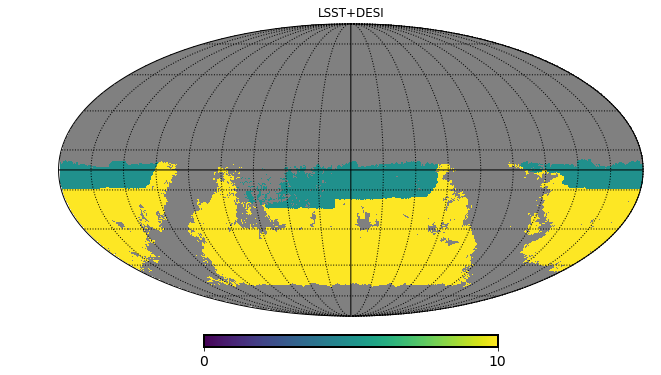

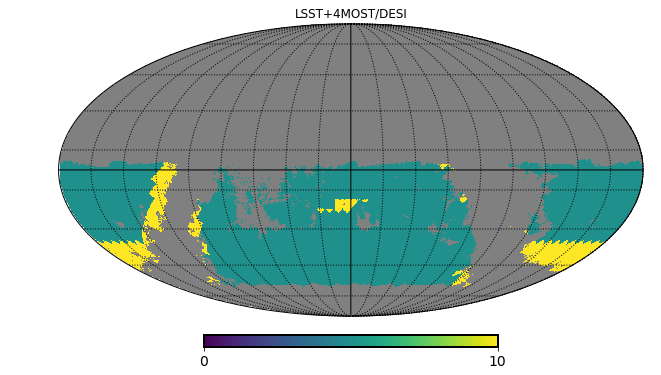

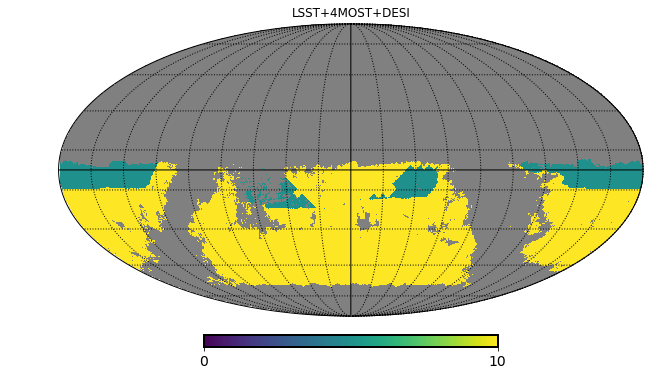


## Reading in eg_footprint_nexus_2097_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_kraken_2035_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_colossus_2667_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_alt_sched_rolling_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_colossus_2664_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_rolling_10yrs_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_kraken_2044_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_baseline2018a_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_pontus_2502_1yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_cadence_roll_75_mix_rolling_mix_10yrs_1yr_nside256_HEALPixe

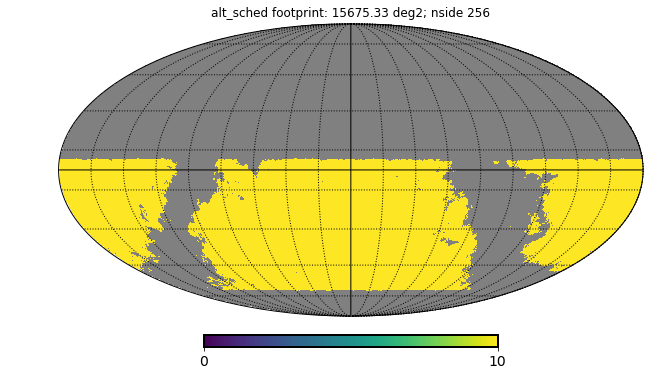

## Calculating the overlaps .. 


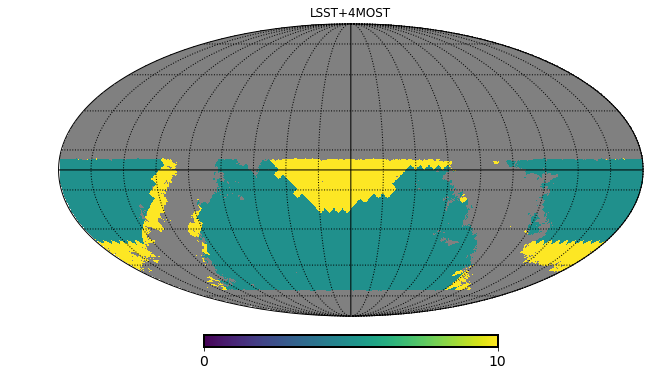

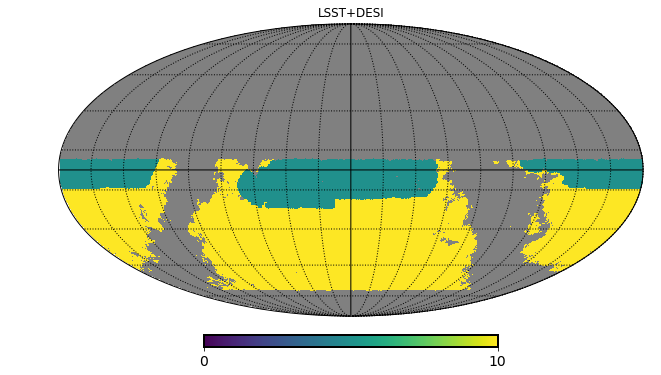

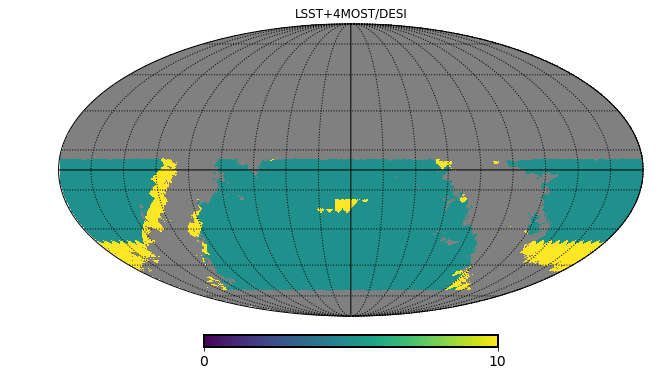

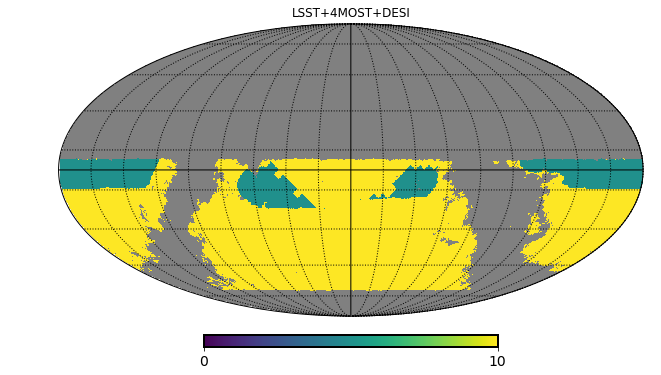


## Reading in eg_footprint_kraken_2035_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_pontus_2002_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_pontus_2489_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_roll_mix_rolling_mix_10yrs_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_kraken_2044_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_alt_sched_rolling_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_colossus_2665_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_mothra_2049_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_rolling_10yrs_3yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_mothra_2045_3yr_nside256_HEALPixels.csv
## Calc

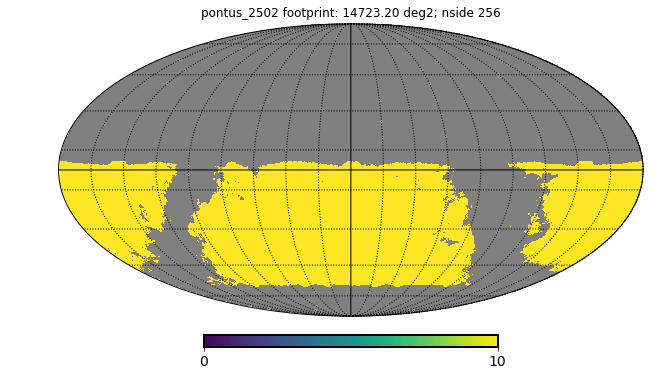

## Calculating the overlaps .. 


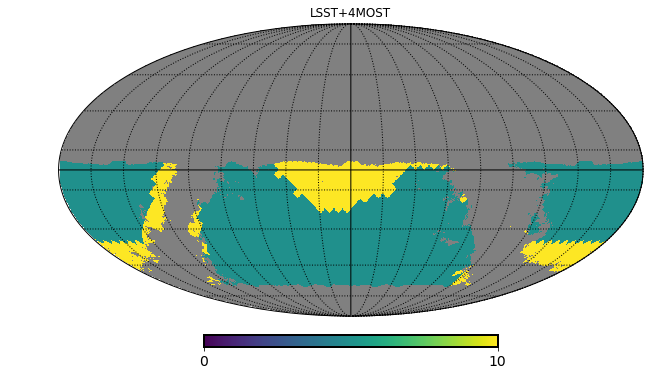

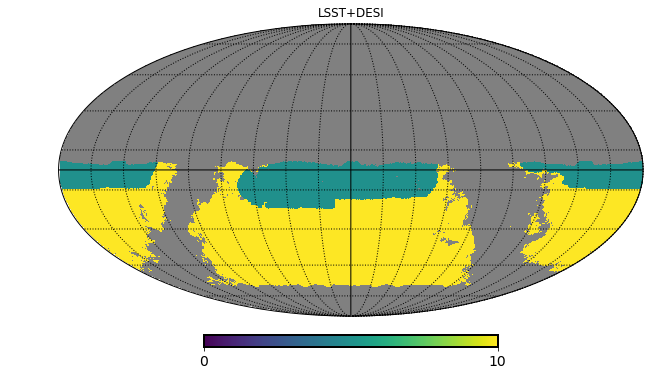

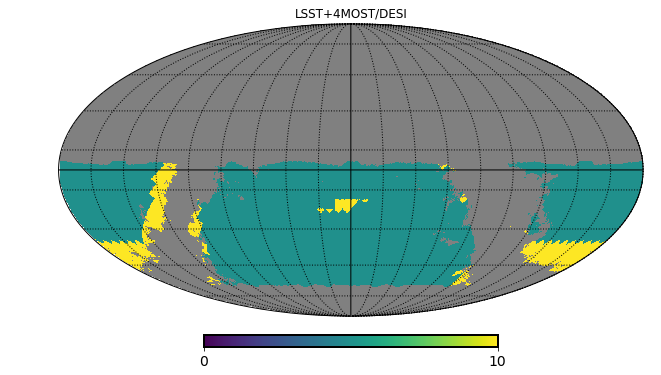

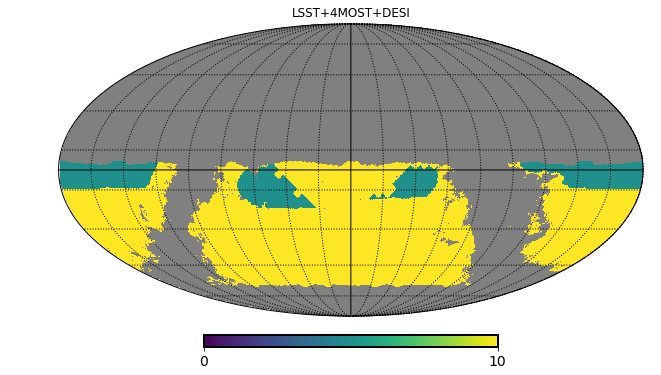


## Reading in eg_footprint_kraken_2035_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_alt_sched_rolling_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_roll_mix_100_rolling_mix_10yrs_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_rolling_10yrs_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_nexus_2097_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_cadence_roll_75_mix_rolling_mix_10yrs_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_pontus_2489_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_kraken_2042_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_tms_roll_10yrs_6yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_roll_mix_rolling_

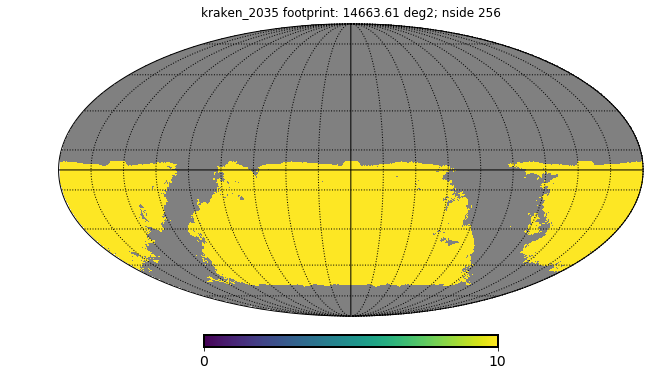

## Calculating the overlaps .. 


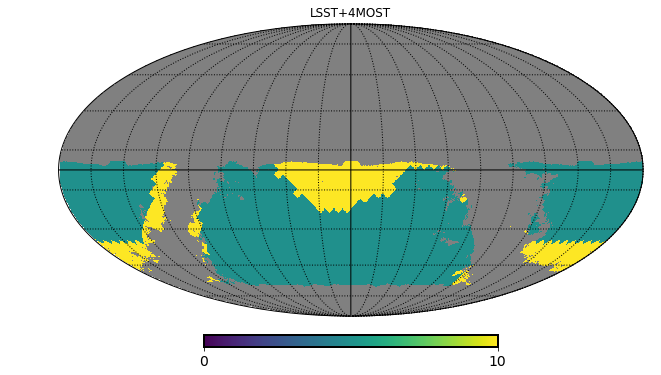

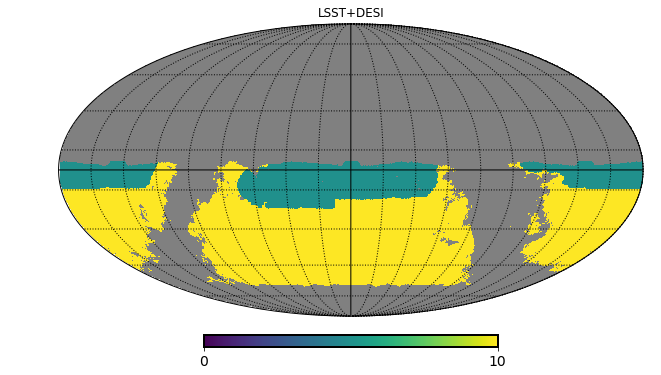

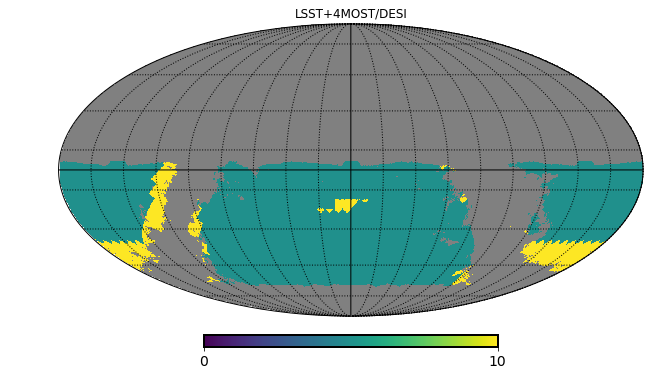

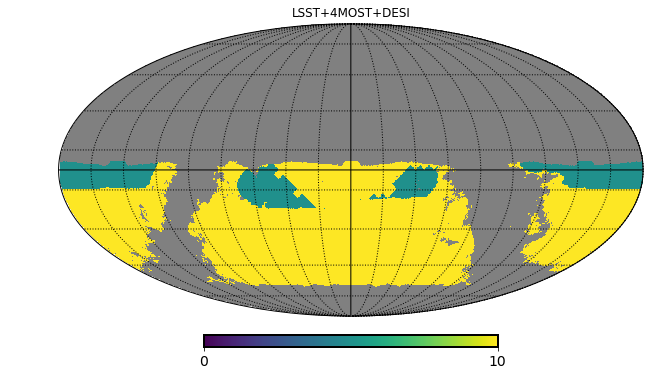


## Reading in eg_footprint_colossus_2665_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_alt_sched_rolling_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_rolling_10yrs_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_kraken_2036_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_tms_roll_10yrs_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_colossus_2667_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_roll_mix_rolling_mix_10yrs_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_mothra_2049_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_nexus_2097_10yr_nside256_HEALPixels.csv
## Calculating the overlaps .. 

## Reading in eg_footprint_baseline2018a_10yr_nside256_HEALPi

In [9]:
%%time
# get all the files
all_files = [f for f in os.listdir(data_dir) if f.endswith('csv') and f.__contains__('eg_footprint')]

overlap_area, tot_lsst_area = {}, {}
for j, yr in enumerate(yrs):  # run over the different years
    # inititate the dictionaries
    if yr not in tot_lsst_area:
        tot_lsst_area[yr] = {}
        
    # get the files for this year
    files = [f for f in all_files if f.__contains__('_%s_'%yr)]
    
    # loop over all the files now; one for each cadence
    for i, file in enumerate(files):
        dbname = file.split('_%s_nside'%yr)[0].split('footprint_')[-1]        
        # read in the data
        print('\n## Reading in %s'%file)
        data = pd.read_csv('%s/%s'%(data_dir, file))
        # extract the pixel numbers
        hp_pix = [int(f) for f in data['pixNum']]

        if i==0: # only plot for the first db
            show_plot = True
        else:
            show_plot = False
        footprint = plot_skymap(tag='%s'%dbname, hpixel_in=hp_pix, nside=nsides['lsst'],
                                return_footprint=True, show_plot=show_plot)
        
        # now check if need to change resolution
        if nsides['lsst']!=nside_final:
            print('## Degrading maps from nside %s to %s .. '%(nsides['lsst'], nside_final))
            footprint.fill_value = -1000
            footprint = hp.ud_grade(footprint, nside_out=nside_final, pess=True)

            lsst_pix = np.where(footprint>10)[0]

            footprint = plot_skymap(tag='Degraded %s'%dbname, hpixel_in=lsst_pix,
                                    nside=nside_final, show_plot=False, return_footprint=True)
        else:
            lsst_pix = hp_pix.copy()
        
        # store the area
        tot_lsst_area[yr][dbname] = get_area(npix=len(lsst_pix), nside=nside_final)
        #print('## Storing the total LSST area for %s .. : %.2f deg2'%(dbname, tot_lsst_area[yr][dbname]))
        
        # ---------------------------------------------------------------------------------------------
        # calculate the overlap
        print('## Calculating the overlaps .. ')
        # ------------------------------------------------
        # first overlap with 4most, desi only
        for key in footprint_pixels:
            #print('## Calculating the overlap with %s .. '%key)
            if 'LSST+%s'%key not in overlap_area:
                overlap_area['LSST+%s'%key] = {}
            if yr not in overlap_area['LSST+%s'%key]:
                overlap_area['LSST+%s'%key][yr] = {}
                
            overlap = list(set(lsst_pix)-(set(lsst_pix)-set(footprint_pixels[key])))

            if i==0: # only plot for the first db
                temp = footprint.copy()
                temp.data[overlap] = 5
                plt.clf()
                hp.mollview(temp, flip='astro',
                            title='LSST+%s'%key,
                            rot=(0,0,0), min=0, max=10)
                hp.graticule(dpar=20, dmer=20, verbose=False)
                plt.show()

            if dbname in overlap_area['LSST+%s'%key][yr]:
                raise ValueError('SOMETHINGS WRONG: already have %s in %s\n'%(dbname,
                                                                              overlap_area['LSST+%s'%key][yr]))
            
            overlap_area['LSST+%s'%key][yr][dbname] = get_area(npix=len(overlap), nside=nside_final)
        
        # ------------------------------------------------
        # now get the overlap with 4most OR desi
        key = 'LSST+4MOST/DESI'
        #print('## Calculating the overlap with %s .. '%key)
        
        overlap = list(set(lsst_pix)-(set(lsst_pix)-set(footprint_pixels['4MOST'])-set(footprint_pixels['DESI'])))

        if i==0: # only plot for the first db
            temp = footprint.copy()
            temp.data[overlap] = 5
            plt.clf()
            hp.mollview(temp, flip='astro',
                        title=key,
                        rot=(0,0,0), min=0, max=10)
            hp.graticule(dpar=20, dmer=20, verbose=False)
            plt.show()
        
        if key not in overlap_area:
            overlap_area[key] = {}
        if yr not in overlap_area[key]:
            overlap_area[key][yr] = {}
        if dbname in overlap_area[key][yr]:
            raise ValueError('SOMETHINGS WRONG: already have %s in %s\n'%(dbname, overlap_area[key][yr]))
        
        overlap_area[key][yr][dbname] = get_area(npix=len(overlap), nside=nside_final)
        
        # ------------------------------------------------
        # now get the overlap with 4most AND desi
        key = 'LSST+4MOST+DESI'
        #print('## Calculating the overlap with %s .. '%key)
        
        overlap = set(footprint_pixels['4MOST'] ) - (set(footprint_pixels['4MOST'] )-set(footprint_pixels['DESI'] ))
        overlap = list(set(lsst_pix)-(set(lsst_pix)-set(overlap)))

        if i==0: # only plot for the first db
            temp = footprint.copy()
            temp.data[overlap] = 5
            plt.clf()
            hp.mollview(temp, flip='astro',
                        title=key,
                        rot=(0,0,0), min=0, max=10)
            hp.graticule(dpar=20, dmer=20, verbose=False)
            plt.show()
        
        if key not in overlap_area:
            overlap_area[key] = {}
        if yr not in overlap_area[key]:
            overlap_area[key][yr] = {}
        if dbname in overlap_area[key][yr]:
            raise ValueError('SOMETHINGS WRONG: already have %s in %s\n'%(dbname,
                                                                          overlap_area[key][yr]))
        
        overlap_area[key][yr][dbname] = get_area(npix=len(overlap), nside=nside_final)

**Compare things across different cadences**

In [10]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', 'colossus_2665', \
          'colossus_2664', 'colossus_2667', 'pontus_2002', 'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097', 
      'cadence_roll_75_mix_rolling_mix_10yrs', 'roll_mix_100_rolling_mix_10yrs', \
            'roll_mix_rolling_mix_10yrs', \
            'rolling_10yrs', 'tms_roll_10yrs', 'alt_sched', 'alt_sched_rolling']

**Plot overlap areas for different cadences**

In [11]:
areas = {}
for key in footprint_pixels:
    areas[key] = get_area(npix=len(footprint_pixels[key]), nside=nside_final)

Saved compare_LSST+4MOST_overlap_22dbs.png


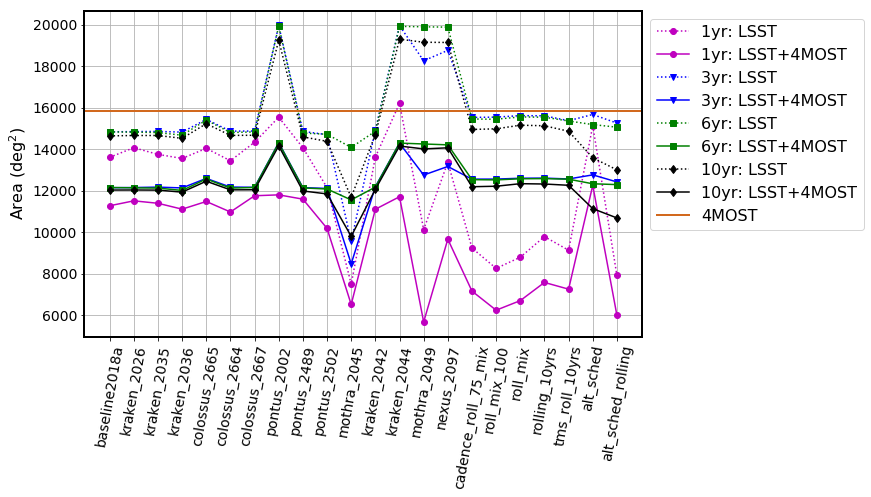

Saved compare_LSST+DESI_overlap_22dbs.png


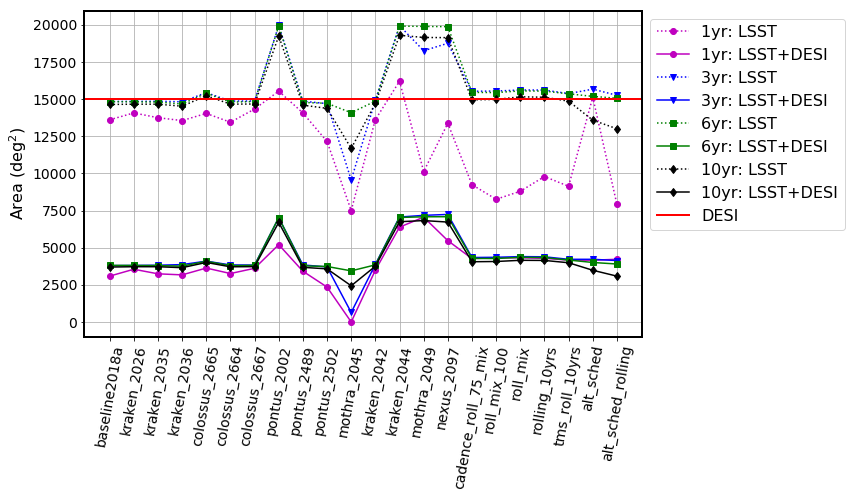

Saved compare_LSST+4MOSTorDESI_overlap_22dbs.png


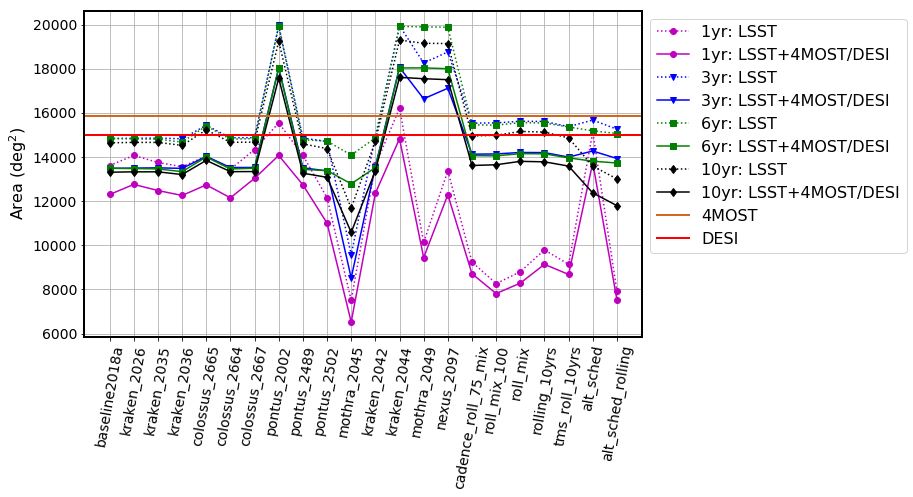

Saved compare_LSST+4MOST+DESI_overlap_22dbs.png


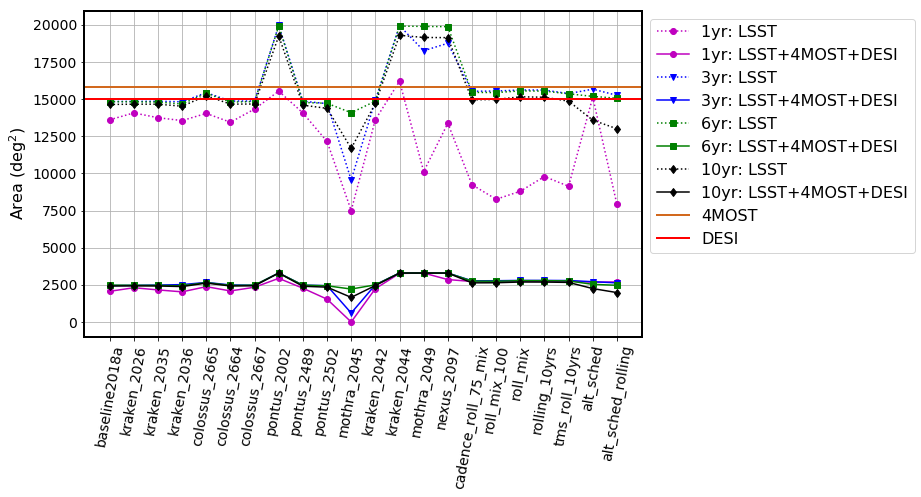

In [12]:
nDbs = len(dbs)

overlap_list = {}
for key in overlap_area:
    xlabels = []
    # first need to create the lists with the data each yr_cut
    plist = {}
    lsst_area, lsst_area_orig = {}, {}
    for dbname in dbs:  # loop over dbs
        if dbname.__contains__('_rolling_mix_10yrs'):
            label = dbname.split('_rolling_mix_10yrs')[0]
        else:
            label = dbname
        xlabels.append(label)
        for yr_cut in yrs:  # loop over yr cuts
            if yr_cut not in plist: plist[yr_cut] = []
            # add this db's area
            plist[yr_cut].append(overlap_area[key][yr_cut][dbname])

            if yr_cut not in lsst_area:
                lsst_area[yr_cut] = []
                lsst_area_orig[yr_cut] = []
            # add this db's area
            lsst_area[yr_cut].append(tot_lsst_area[yr_cut][dbname])

    overlap_list[key] = plist.copy()   # for md printing purposes
    
    # now plot
    for i, yr_cut in enumerate(yrs):
        plt.plot(range(nDbs), lsst_area[yr_cut], '%s:'%shapes[i], color=colors[i], label='%s: LSST'%yr_cut) 
        plt.plot(range(nDbs), plist[yr_cut], '%s-'%shapes[i], color=colors[i], label='%s: %s'%(yr_cut, key) )

    # plot the 4MOST area
    xmin, xmax = plt.gca().get_xlim()
    if key.__contains__('4MOST'):
        plt.plot([xmin, xmax], np.zeros(2)+areas['4MOST'], '-', color=[210/255., 105/255., 30/255.], lw=2, label='4MOST') 
    if key.__contains__('DESI'):
        plt.plot([xmin, xmax], np.zeros(2)+areas['DESI'], '-', color=[255/255., 0/255., 0/255.], lw=2, label='DESI') 

    # plot details
    plt.grid()
    plt.xlim(xmin, xmax)
    plt.legend(bbox_to_anchor=(1.,1))
    plt.ylabel(r'Area (deg$^2$)')
    plt.xticks(range(nDbs), xlabels, rotation=80)
    if key.__contains__('/'):
        key = key.replace('/', 'or')
    filename = 'compare_%s_overlap_%sdbs.png'%(key, nDbs)
    plt.savefig('%s/%s'%(outDir, filename), format='png', bbox_inches='tight')
    print('Saved %s'%filename)
    plt.show()

Okay, very little area (comparatively) is covered by both 4MOST and DESI, so 4MOST or DESI overlap with LSST is a good metric.

**Just to check things: plot the total area calculated here from the lower-nside**

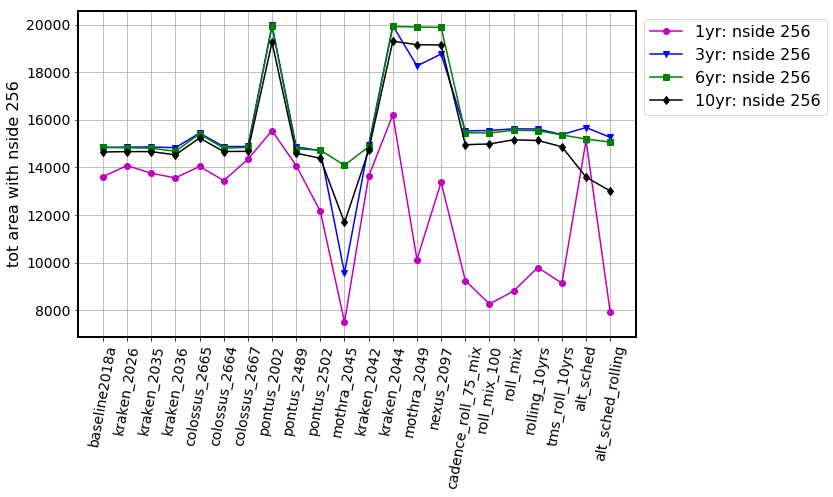

In [13]:
for i, yr_cut in enumerate(yrs):
    plt.plot(range(nDbs), lsst_area[yr_cut], '%s-'%shapes[i], color=colors[i], label='%s: nside %s'%(yr_cut, nside_final) )

# plot details
plt.grid()
plt.legend(bbox_to_anchor=(1.,1))
plt.ylabel(r'tot area with nside %s'%nside_final)
plt.xticks(range(nDbs), xlabels, rotation=80)
plt.show()

Okay good, this figure matches the one summarize_outputs.ipynb in the main depth_cuts folder.

**Print md entries for the summary table**

In [14]:
for yr_cut in plist:
    print('\n%s'%yr_cut)
    header = '| dbname | '
    header2 = '| --- | '
    for i, db in enumerate(xlabels):
        row = '| %s |'%db
        key = 'LSST'
        if i==0:
            header += '%s | ' %key
            header2 += '--- | '
        row += ' %.2f |'%(lsst_area[yr_cut][i])

        for key in overlap_list:
            plist = overlap_list[key]
            if i==0:
                header += '%s | ' %key
                header2 += '--- | '
            row += ' %.2f |'%(plist[yr_cut][i])
    
        if i==0:
            print(header)
            print(header2)
        print(row)


1yr
| dbname | LSST | LSST+4MOST | LSST+DESI | LSST+4MOST/DESI | LSST+4MOST+DESI | 
| --- | --- | --- | --- | --- | --- | 
| baseline2018a | 13612.92 | 11278.95 | 3087.08 | 12302.37 | 2063.67 |
| kraken_2026 | 14075.69 | 11516.26 | 3550.68 | 12760.78 | 2306.17 |
| kraken_2035 | 13753.66 | 11398.76 | 3242.56 | 12482.18 | 2159.14 |
| kraken_2036 | 13558.63 | 11115.13 | 3171.32 | 12257.99 | 2028.47 |
| colossus_2665 | 14043.17 | 11485.58 | 3630.94 | 12738.43 | 2378.09 |
| colossus_2664 | 13446.95 | 10979.11 | 3261.86 | 12151.29 | 2089.68 |
| colossus_2667 | 14338.07 | 11761.02 | 3614.16 | 13036.07 | 2339.11 |
| pontus_2002 | 15544.35 | 11804.51 | 5205.72 | 14072.44 | 2937.79 |
| pontus_2489 | 14074.95 | 11597.62 | 3417.03 | 12741.11 | 2273.54 |
| pontus_2502 | 12154.34 | 10189.65 | 2351.70 | 11004.35 | 1537.01 |
| mothra_2045 | 7504.49 | 6524.14 | 0.00 | 6524.14 | 0.00 |
| kraken_2042 | 13621.37 | 11110.94 | 3487.42 | 12355.03 | 2243.33 |
| kraken_2044 | 16210.07 | 11713.65 | 6385.24 | 1

In [15]:
# just one of the variants
for yr_cut in plist:
    print('\n%s'%yr_cut)
    header = '| dbname | '
    header2 = '| --- | '
    
    for i, db in enumerate(xlabels):
        row = '| %s |'%db

        key = 'LSST+4MOST/DESI'
        plist = overlap_list[key]
        if i==0:
            header += '%s | ' %key
            header2 += '--- | '
        row += ' %.2f |'%(plist[yr_cut][i])
    
        if i==0:
            print(header)
            print(header2)
        print(row)


1yr
| dbname | LSST+4MOST/DESI | 
| --- | --- | 
| baseline2018a | 12302.37 |
| kraken_2026 | 12760.78 |
| kraken_2035 | 12482.18 |
| kraken_2036 | 12257.99 |
| colossus_2665 | 12738.43 |
| colossus_2664 | 12151.29 |
| colossus_2667 | 13036.07 |
| pontus_2002 | 14072.44 |
| pontus_2489 | 12741.11 |
| pontus_2502 | 11004.35 |
| mothra_2045 | 6524.14 |
| kraken_2042 | 12355.03 |
| kraken_2044 | 14829.11 |
| mothra_2049 | 9444.31 |
| nexus_2097 | 12290.67 |
| cadence_roll_75_mix | 8709.93 |
| roll_mix_100 | 7812.83 |
| roll_mix | 8285.66 |
| rolling_10yrs | 9136.97 |
| tms_roll_10yrs | 8679.24 |
| alt_sched | 13740.55 |
| alt_sched_rolling | 7530.51 |

3yr
| dbname | LSST+4MOST/DESI | 
| --- | --- | 
| baseline2018a | 13490.28 |
| kraken_2026 | 13498.52 |
| kraken_2035 | 13511.47 |
| kraken_2036 | 13485.67 |
| colossus_2665 | 14030.63 |
| colossus_2664 | 13524.74 |
| colossus_2667 | 13527.42 |
| pontus_2002 | 18039.15 |
| pontus_2489 | 13510.79 |
| pontus_2502 | 13372.89 |
| mothra_2045 